## Nettoyage et prétraitement des données :

In [2]:
import pandas as pd
import numpy
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

#importation des données :
alexa_reviews_data=pd.read_csv('amazon_alexa.tsv', sep='\t')

alexa_reviews_data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
# Étape 2 : Analyse des caractéristiques principales
print("Nombre de lignes et de colonnes :", alexa_reviews_data.shape)
print("\nTypes de données dans chaque colonne :")
print(alexa_reviews_data.dtypes)
print("\nRépartition des classes :")
print(alexa_reviews_data['feedback'].value_counts())

Nombre de lignes et de colonnes : (3150, 5)

Types de données dans chaque colonne :
rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

Répartition des classes :
1    2893
0     257
Name: feedback, dtype: int64


In [4]:
# Étape 3 : Exploration des variables textuelles
alexa_reviews_data['feedback_length'] = alexa_reviews_data['verified_reviews'].apply(len)
print("\nLongueur moyenne des avis :", alexa_reviews_data['feedback_length'].mean())

# Étape 4 : Analyse des variables numériques
print("\nStatistiques descriptives pour la note attribuée par les utilisateurs :")
print(alexa_reviews_data['rating'].describe())


Longueur moyenne des avis : 132.0495238095238

Statistiques descriptives pour la note attribuée par les utilisateurs :
count    3150.000000
mean        4.463175
std         1.068506
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


c:\Users\leonm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


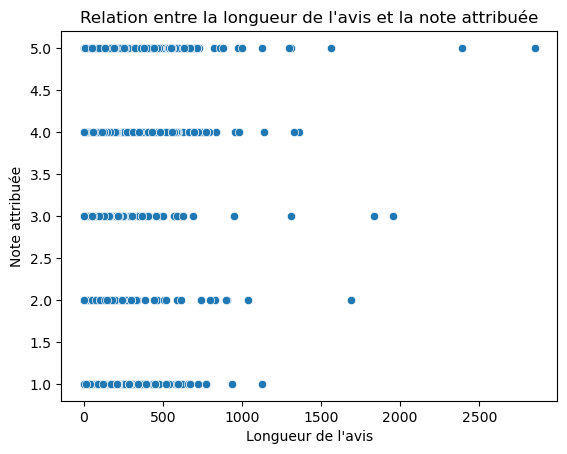

In [5]:

# Tracer le scatterplot
sns.scatterplot(alexa_reviews_data['verified_reviews'].apply(len), alexa_reviews_data['rating'])

# Ajouter un titre et des étiquettes d'axe
plt.title('Relation entre la longueur de l\'avis et la note attribuée')
plt.xlabel('Longueur de l\'avis')
plt.ylabel('Note attribuée')

# Afficher le graphique
plt.show()

In [7]:

# Télécharger les ressources nécessaires pour NLTK
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
# Fonction de nettoyage du texte
def clean_text(text):
    # Supprimer les balises HTML
    clean_text = re.sub(r'<.*?>', '', text)
    # Supprimer les liens
    clean_text = re.sub(r'http\S+', '', clean_text)
    # Supprimer la ponctuation
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    # Convertir en minuscules
    clean_text = clean_text.lower()
    return clean_text

# Fonction de lemmatisation du texte
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    return " ".join(lemmatized_tokens)

# Supprimer les mots vides
stop_words = set(stopwords.words("english"))


alexa_reviews_data['cleaned_text'] = alexa_reviews_data['verified_reviews'].apply(clean_text)
alexa_reviews_data['lemmatized_text'] = alexa_reviews_data['cleaned_text'].apply(lemmatize_text)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leonm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leonm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leonm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
alexa_reviews_data

,rating,date,variation,verified_reviews,feedback,feedback_length,cleaned_text,lemmatized_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love my echo,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,loved it,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,music
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,perfect for kids adults and everyone in between,perfect for kid adult and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,listening to music searching locations checkin...,listening to music searching location checking...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,i do love these things i have them running my ...,i do love these thing i have them running my e...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,only complaint i have is that the sound qualit...,only complaint i have is that the sound qualit...


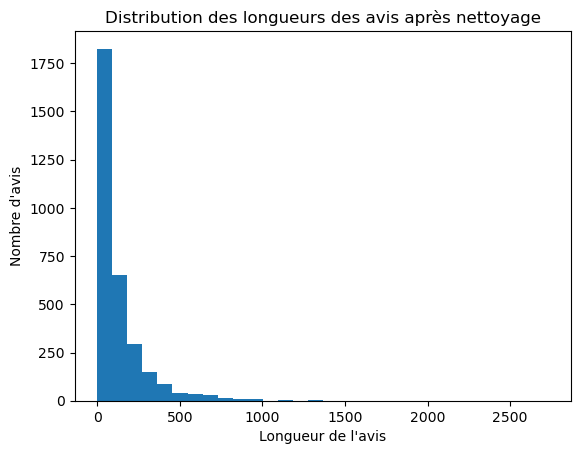

In [9]:
import matplotlib.pyplot as plt

# Tracer l'histogramme des longueurs des avis
plt.hist(alexa_reviews_data['cleaned_text'].str.len(), bins=30)
plt.title('Distribution des longueurs des avis après nettoyage')
plt.xlabel('Longueur de l\'avis')
plt.ylabel('Nombre d\'avis')
plt.show()


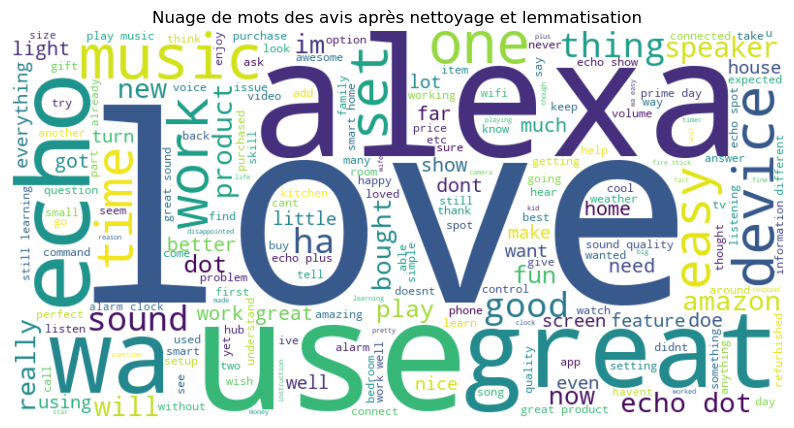

In [10]:
from wordcloud import WordCloud

# Concaténer tous les avis nettoyés en un seul texte
all_cleaned_text = ' '.join(alexa_reviews_data['lemmatized_text'])

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des avis après nettoyage et lemmatisation')
plt.show()


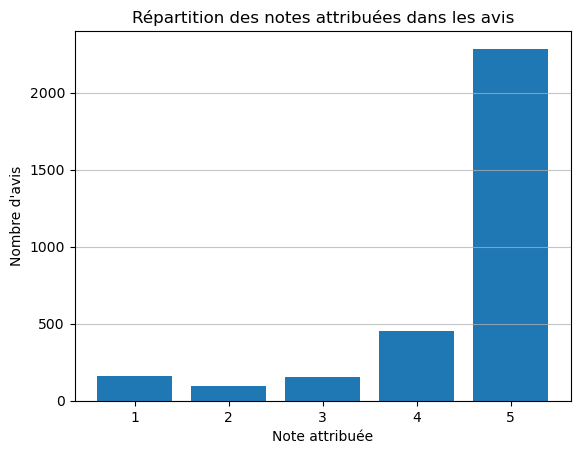

In [11]:
# Tracer un histogramme des notes attribuées
plt.hist(alexa_reviews_data['rating'], bins=5, range=(0.5, 5.5), align='mid', rwidth=0.8)
plt.title('Répartition des notes attribuées dans les avis')
plt.xlabel('Note attribuée')
plt.ylabel('Nombre d\'avis')
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.75)
plt.show()


In [12]:
nltk.download('omw-1.4')
technical_support_data =alexa_reviews_data

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\leonm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Construction du modèle de chatbot (RNN) :

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU


# Nombre maximal de mots à utiliser
MAX_NUM_WORDS = 10000
# Longueur maximale de la séquence
MAX_SEQUENCE_LENGTH = 100
# Dimension de l'embedding
EMBEDDING_DIM = 100
# Division des données
X_train, X_test, y_train, y_test = train_test_split(alexa_reviews_data['verified_reviews'], alexa_reviews_data['feedback'], test_size=0.2, random_state=42)




In [25]:
EMBEDDING_DIM

100

In [26]:
num_words

3938

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Tokenizer pour transformer le texte en séquences d'entiers
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
# Construire les séquences de même longueur
X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Nombre total de mots dans le vocabulaire
num_words = min(MAX_NUM_WORDS, len(tokenizer.word_index) + 1)

# Modèle RNN
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher un résumé du modèle
print(model.summary())


TypeError: <lambda>() missing 1 required positional argument: 'ref'

In [24]:
model

<Sequential name=sequential_8, built=False>

## Entraînement du modèle :

In [36]:

# Entraîner le modèle
model.fit(X_train_padded, y_train, epochs=30, batch_size=128, validation_data=(X_test_padded, y_test))


ValueError: You must call `compile()` before using the model.

In [68]:
filename = 'chatbot_support_technique.h5'
model.save(filename)

## Évaluation du modèle :

In [61]:
# Fonction d'évaluation du modèle
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)




In [62]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

20/20 [==============================] - 0s 22ms/step - loss: 0.2968 - accuracy: 0.9349
Test Loss: 0.2967887222766876
Test Accuracy: 0.934920608997345


Training LSTM...
20/20 [==============================] - 1s 27ms/step - loss: 0.2445 - accuracy: 0.9302
Training Bidirectional LSTM...
20/20 [==============================] - 1s 36ms/step - loss: 0.2337 - accuracy: 0.9286
Training GRU...
20/20 [==============================] - 0s 14ms/step - loss: 0.3339 - accuracy: 0.9254


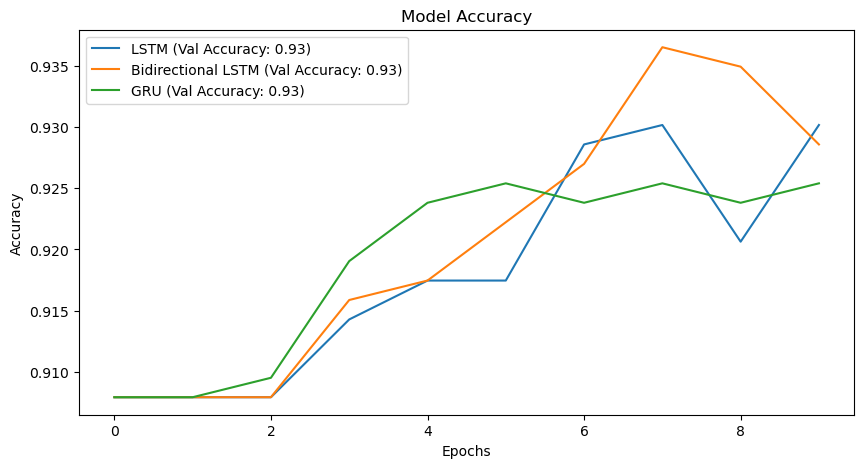

In [66]:
# Définition des modèles
models = [
    ("LSTM", Sequential([
        Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ])),
    ("Bidirectional LSTM", Sequential([
        Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        Bidirectional(LSTM(128)),
        Dense(1, activation='sigmoid')
    ])),
    ("GRU", Sequential([
        Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        GRU(128),
        Dense(1, activation='sigmoid')
    ]))
]

# Entraîner et évaluer les modèles
results = []
for name, model in models:
    print(f"Training {name}...")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_padded, y_train, epochs=10, batch_size=128, validation_data=(X_test_padded, y_test), verbose=0)
    loss, accuracy = model.evaluate(X_test_padded, y_test)
    results.append((name, history, loss, accuracy))

# Comparaison des performances
plt.figure(figsize=(10, 5))
for name, history, loss, accuracy in results:
    plt.plot(history.history['val_accuracy'], label=f'{name} (Val Accuracy: {accuracy:.2f})')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Déploiement sur Streamlit :

In [27]:


# Préparation de la question
question = "Quelles sont les fonctionnalités de ce produit ?"

# Prétraitement de la question
cleaned_question = clean_text(question)
lemmatized_question = lemmatize_text(cleaned_question)

# Conversion en séquence
question_sequence = tokenizer.texts_to_sequences([lemmatized_question])
question_padded = pad_sequences(question_sequence, maxlen=MAX_SEQUENCE_LENGTH)

# Prédiction
prediction = model.predict(question_padded)[0][0]

# Affichage de la réponse
if prediction >= 0.5:
    print("Réponse : Cette fonctionnalité est très appréciée par nos utilisateurs.")
else:
    print("Réponse : Désolé, nous n'avons pas encore reçu suffisamment de retours sur cette fonctionnalité.")



NameError: name 'tokenizer' is not defined